In [21]:
!pip install opencv-python-headless
!pip uninstall opencv-python-headless
!pip install opencv-python
!pip install opencv-contrib-python

^C
^C


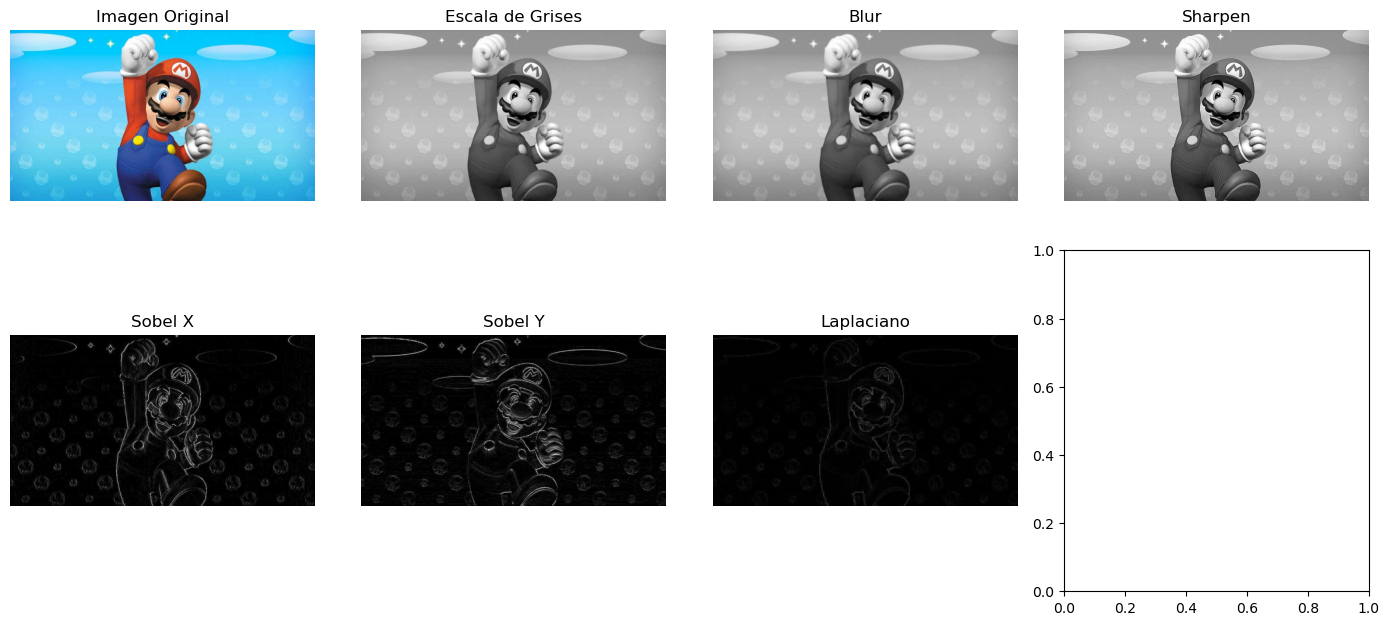

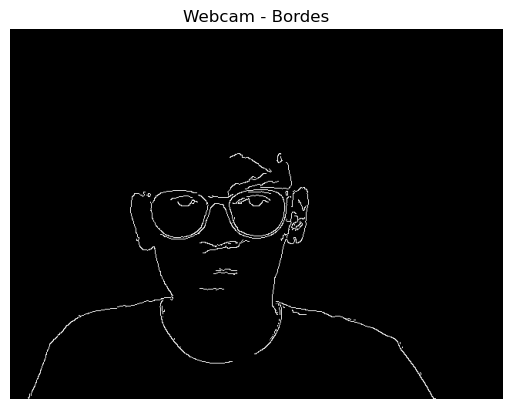

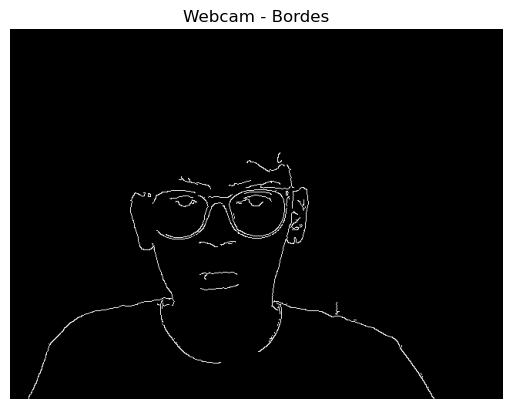

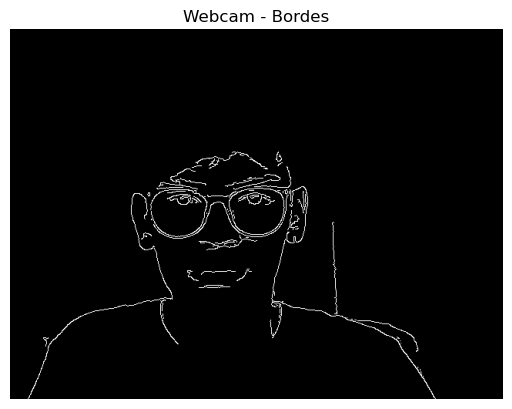

Interrupción manual detectada. Cerrando...


In [2]:
# Importar las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar la imagen a color
path = 'mario.jpg'  # Cambia esta ruta a tu imagen
img_color = cv2.imread(path)

# Verificar si la imagen se cargó correctamente
if img_color is None:
    print(f"No se pudo cargar la imagen en '{path}'. Asegúrate de que la ruta sea correcta.")
else:
    # 2. Convertir a escala de grises
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # 3. Aplicar filtros convolucionales simples
    #   a) Blur Gaussiano (suavizado)
    blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

    #   b) Filtro de Sharpening (enfoque)
    kernel_sharp = np.array([[0, -1,  0],
                             [-1, 5, -1],
                             [0, -1, 0]])
    sharpen = cv2.filter2D(img_gray, -1, kernel_sharp)

    # 4. Detección de bordes
    #   a) Filtro Sobel en X y Y
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
    sobelx = np.uint8(np.absolute(sobelx))
    sobely = np.uint8(np.absolute(sobely))

    #   b) Filtro Laplaciano
    laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))

    # 5. Visualización de los resultados usando matplotlib
    fig, axes = plt.subplots(2, 4, figsize=(14, 7))

    # Mostrar las imágenes
    images = [cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB), img_gray, blur, sharpen, sobelx, sobely, laplacian]
    titles = ['Imagen Original', 'Escala de Grises', 'Blur', 'Sharpen', 'Sobel X', 'Sobel Y', 'Laplaciano']
    
    for ax, im, t in zip(axes.flatten(), images, titles):
        ax.imshow(im if im.ndim == 3 else im, cmap=('gray' if im.ndim==2 else None))
        ax.set_title(t)
        ax.axis('off')

    plt.tight_layout()
    plt.show()
# 6. (Opcional) Usar la webcam para procesar imágenes en tiempo real
    # Habilitar webcam (si deseas probar esta parte, quita los comentarios y ejecuta en tu máquina)
cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edge_frame = cv2.Canny(gray_frame, 50, 150)

        # Display the frame using Matplotlib
        plt.imshow(edge_frame, cmap='gray')
        plt.title("Webcam - Bordes")
        plt.axis('off')
        plt.show(block=False)
        plt.pause(2)  # Pause to allow the plot to update
        plt.clf()  # Clear the figure for the next frame

        # Exit condition: Use a break after a fixed number of frames or manually interrupt
except KeyboardInterrupt:
    print("Interrupción manual detectada. Cerrando...")

cap.release()
plt.close()
